<a href="https://colab.research.google.com/github/Saikat-RMSTU/LifeExpectancyPrediction_with_ML/blob/main/Life_Expectency_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import learning_curve
import joblib
import shap

# Set visualization style and palette
sns.set_style("whitegrid")
sns.set_palette("coolwarm")


In [ ]:
#2: Upload Dataset
from google.colab import files
uploaded_files = files.upload()
import io
data_key = list(uploaded_files.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded_files[data_key]))
print(f"Dataset '{data_key}' uploaded successfully!")


Saving Life Expectancy Data.csv to Life Expectancy Data (2).csv
Dataset 'Life Expectancy Data (2).csv' uploaded successfully!


In [ ]:
#3: Normalize Column Names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
#4: Inspect Dataset
data.head()  # Display the first few rows


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#4.1: Dataset Summary
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")
print(data.info())



Number of rows: 2938
Number of columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 n

In [ ]:
#5: Check Missing Values
missing_values = data.isnull().sum()
print("Missing Values Summary:\n", missing_values)


Missing Values Summary:
 country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64


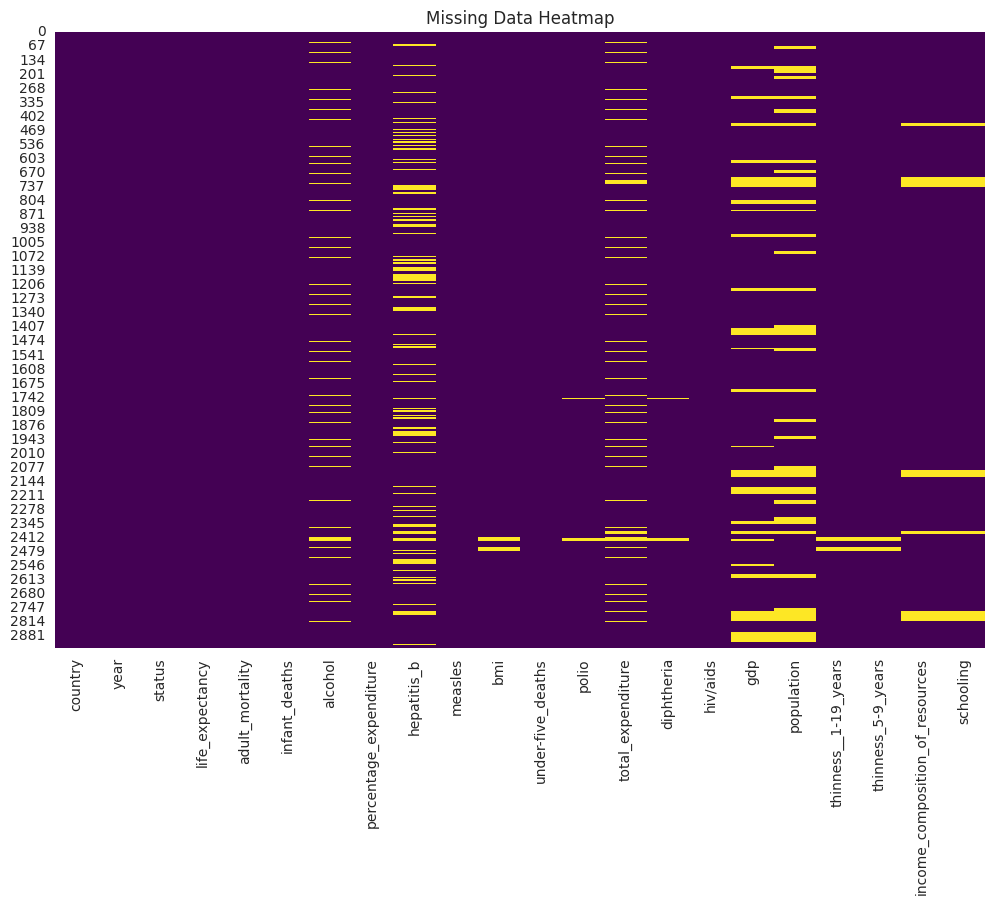

In [ ]:
#5.1: Visualize Missing Data
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
#6: Summary Statistics
data.describe().T  # Add summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life_expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
adult_mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage_expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis_b,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
bmi,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five_deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


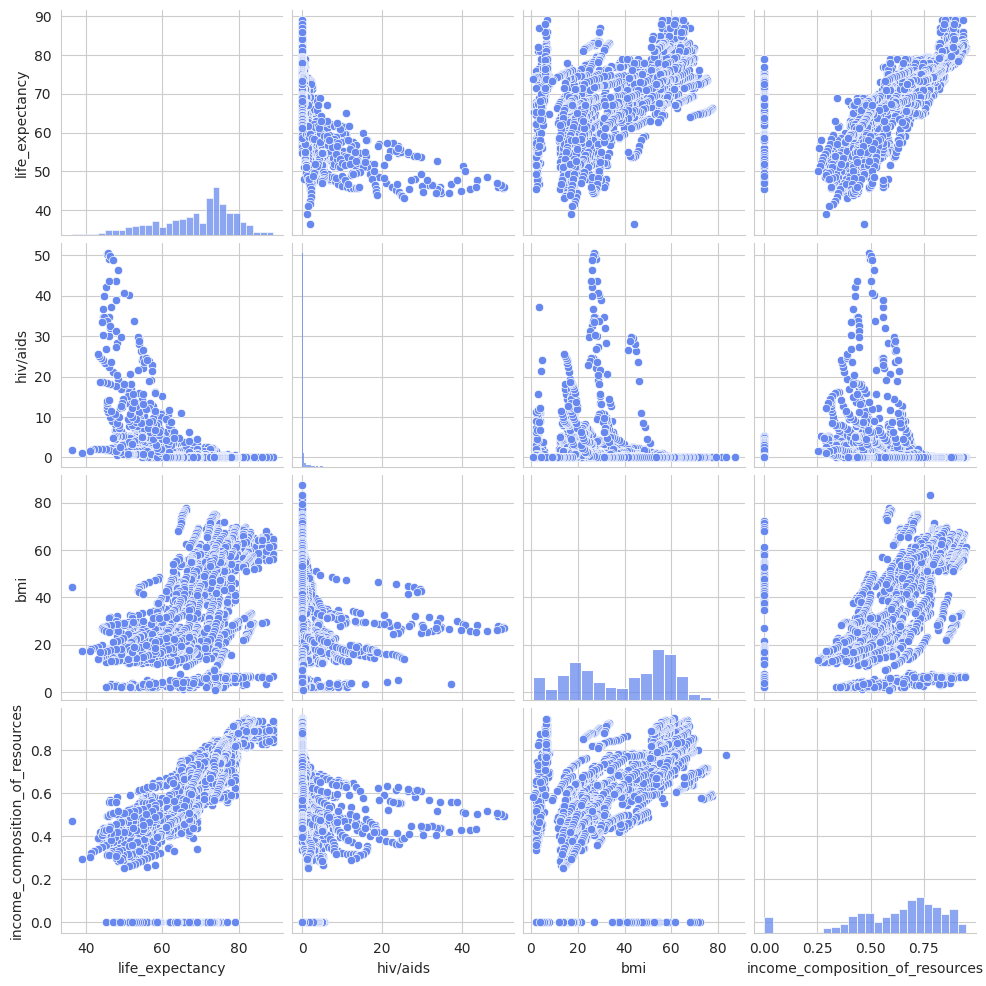

In [ ]:
#7: Pairplot for Numeric Features
sns.pairplot(data[['life_expectancy', 'hiv/aids', 'bmi', 'income_composition_of_resources']])
plt.show()


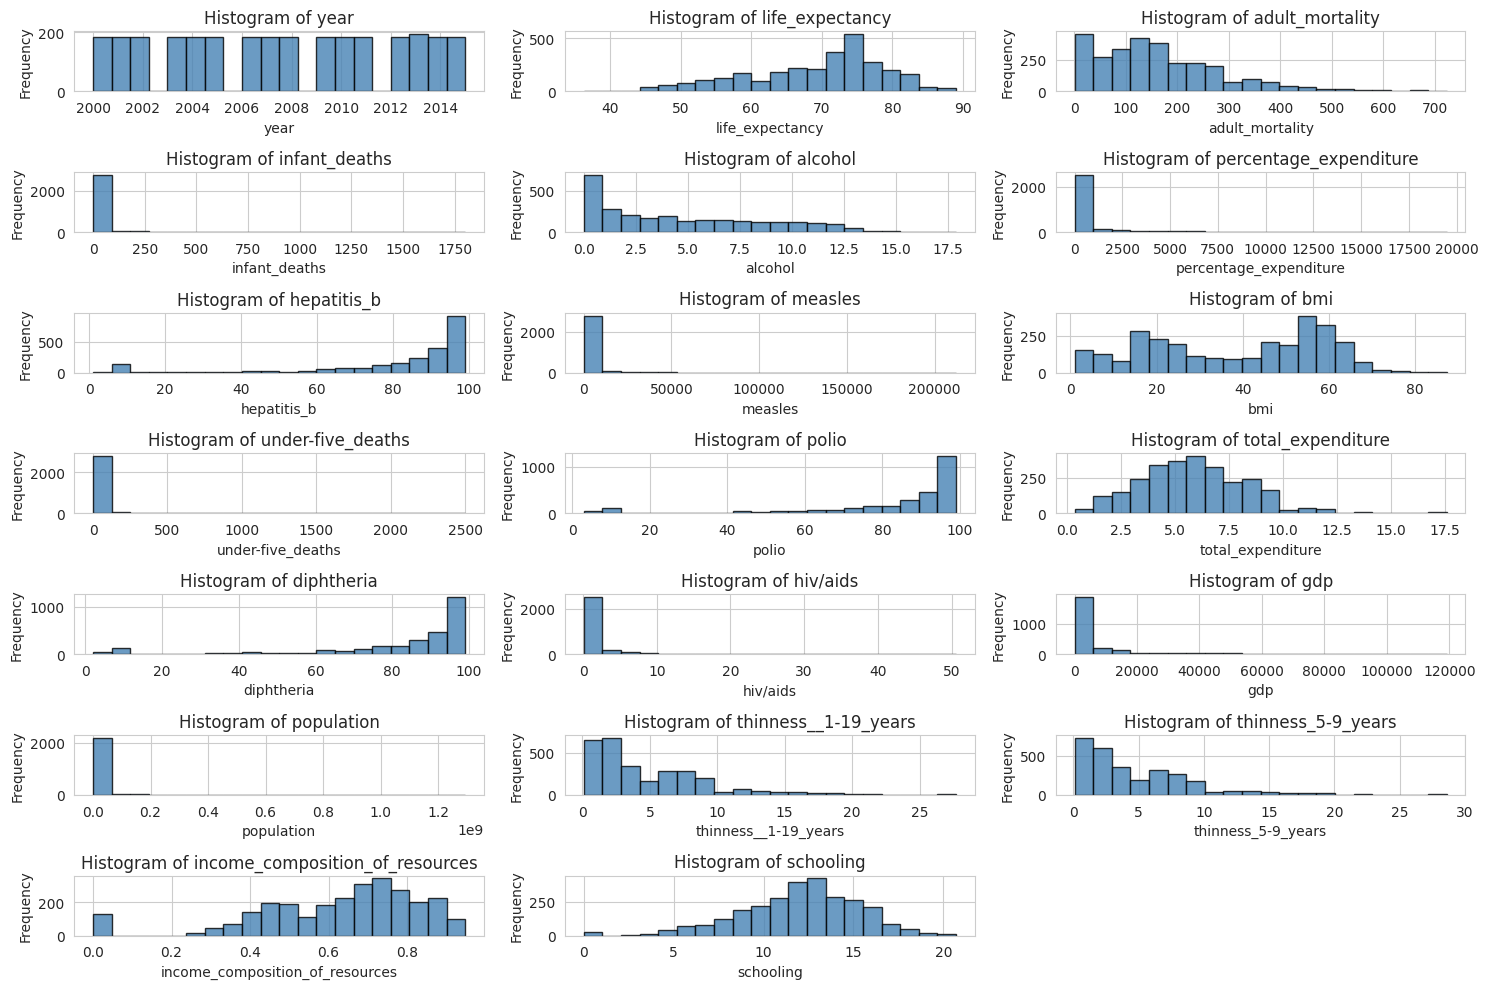

In [ ]:
#8: Visualize Histograms for All Numerical Columns
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select numerical columns

plt.figure(figsize=(15, 10))  # Adjust figure size for better visualization
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # Adjust layout for subplots
    plt.hist(data[col], bins=20, color="steelblue", edgecolor="black", alpha=0.8)  # Add histogram
    plt.title(f"Histogram of {col}")  # Add title
    plt.xlabel(col)  # X-axis label
    plt.ylabel("Frequency")  # Y-axis label

plt.tight_layout()  # Ensure subplots do not overlap
plt.show()


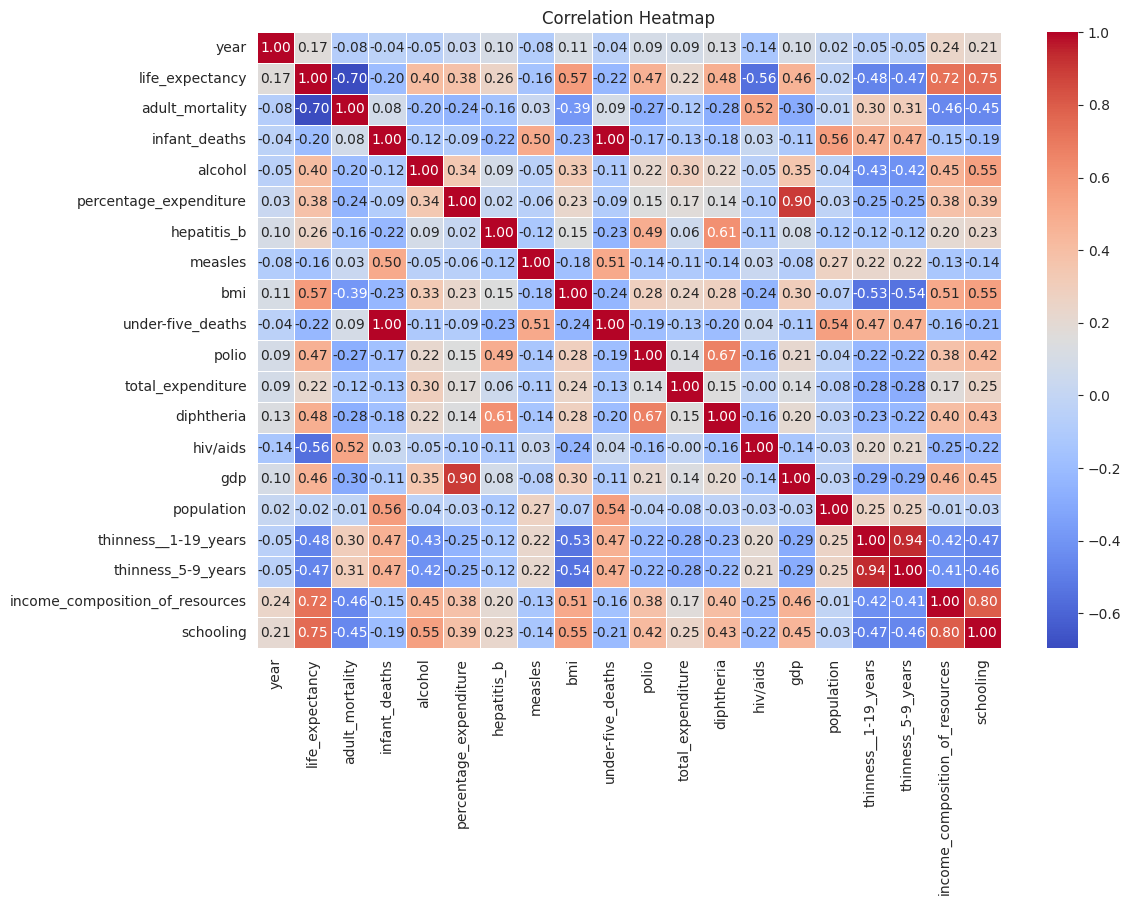

In [ ]:
#9: Correlation Heatmap for All Numeric Features
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#10: Define Count Plot Function
def count_plot(x_col=None, y_col=None, hue_col=None, rotation_angle=45, top_limit=None):
    if x_col:
        ordered = data[x_col].value_counts().iloc[:top_limit].index
    elif y_col:
        ordered = data[y_col].value_counts().iloc[:top_limit].index
    sns.countplot(x=x_col, y=y_col, hue=hue_col, data=data, order=ordered)
    plt.xticks(rotation=rotation_angle)
    plt.show()


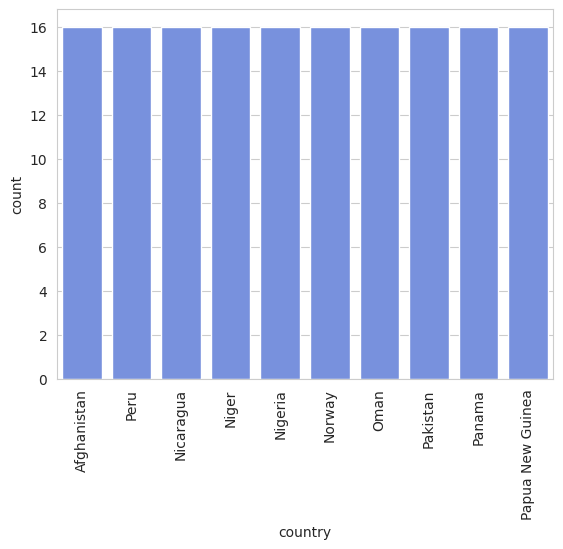

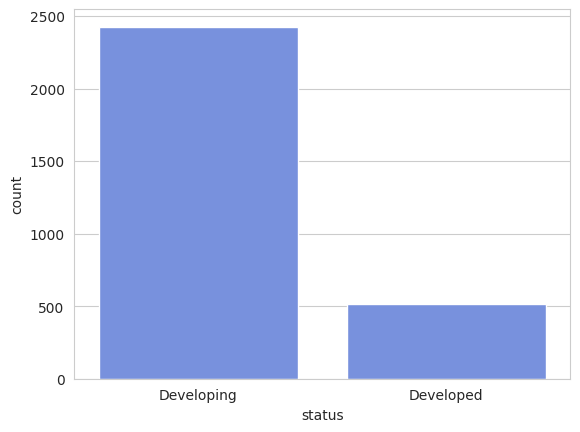

In [ ]:
#11: Use Count Plot Function
count_plot(x_col="country", top_limit=10, rotation_angle=90)  # Top 10 countries by count
count_plot(x_col="status", rotation_angle=0)  # Count of 'status'


In [ ]:
#12: Define Pie Plot Function
def pie_chart(col_name):
    values = data[col_name].value_counts()
    labels = values.index
    plt.figure(figsize=(10, 8))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("coolwarm"))
    plt.title(f"Distribution of {col_name.title()}")
    plt.show()


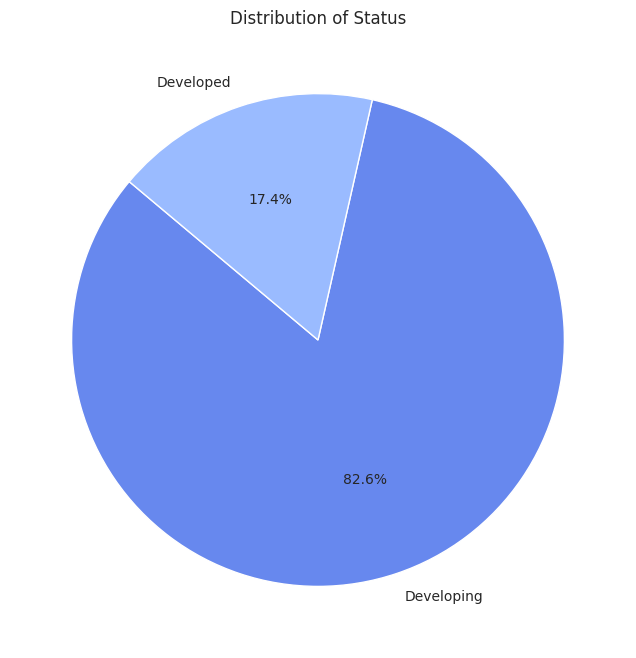

In [ ]:
#13: Use Pie Chart Function
pie_chart(col_name="status")


In [ ]:
#14: Split Dataset
train, test = train_test_split(data, test_size=0.2, random_state=42)
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")


Train Shape: (2350, 22)
Test Shape: (588, 22)


In [ ]:
#15: Handle Missing Values
def fill_missing(df):
    return df.fillna(df.median(numeric_only=True))

train = fill_missing(train)
test = fill_missing(test)


In [ ]:
#15.1: Verify Missing Values After Handling
def check_missing_values(df, dataset_name):
    missing_count = df.isnull().sum().sum()
    if missing_count > 0:
        print(f"Warning: {dataset_name} still has {missing_count} missing values.")
    else:
        print(f"{dataset_name} has no missing values.")

check_missing_values(train, "Train Dataset")
check_missing_values(test, "Test Dataset")


Train Dataset has no missing values.
Test Dataset has no missing values.


In [ ]:
#16: Feature and Target Selection
encoder_tool = LabelEncoder()
for category in ["country", "status"]:
    train[category] = encoder_tool.fit_transform(train[category])
    test[category] = encoder_tool.fit_transform(test[category])

x_train = train[['hiv/aids', 'income_composition_of_resources', 'adult_mortality', 'bmi', 'under-five_deaths']]
y_train = train["life_expectancy"]
x_test = test[['hiv/aids', 'income_composition_of_resources', 'adult_mortality', 'bmi', 'under-five_deaths']]
y_test = test["life_expectancy"]



In [ ]:
#17: Feature Engineering
train['bmi_to_hiv_ratio'] = train['bmi'] / train['hiv/aids']
test['bmi_to_hiv_ratio'] = test['bmi'] / test['hiv/aids']


In [ ]:
#18: Normalize Data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
#19: Train and Evaluate Models
def run_model(ml_model, model_name):
    ml_model.fit(x_train_scaled, y_train)
    train_predictions = ml_model.predict(x_train_scaled)
    test_predictions = ml_model.predict(x_test_scaled)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"Model: {model_name}")
    print(f"Train R2: {train_r2:.4f}")
    print(f"Test R2: {test_r2:.4f}\n")



In [ ]:
#20: Cross-Validation
rf_model = RandomForestRegressor()
scores = cross_val_score(rf_model, x_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean R2: {np.mean(scores):.4f}\n")


Cross-Validation Scores: [0.96028628 0.95995775 0.95545014 0.95377877 0.94178669]
Mean R2: 0.9543



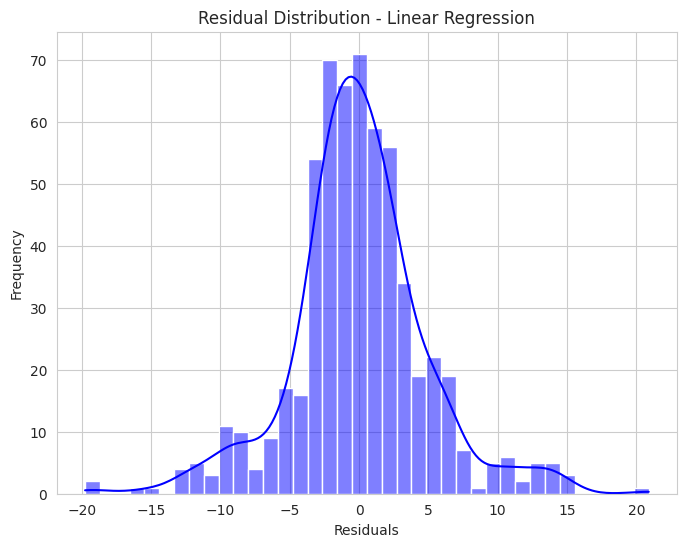

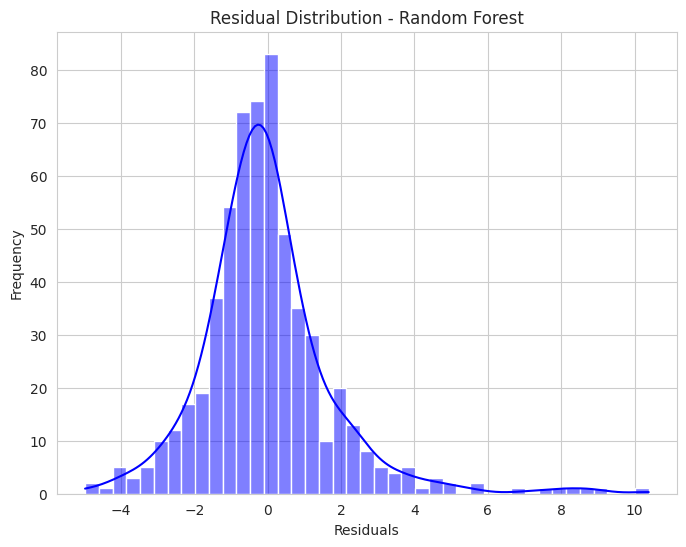

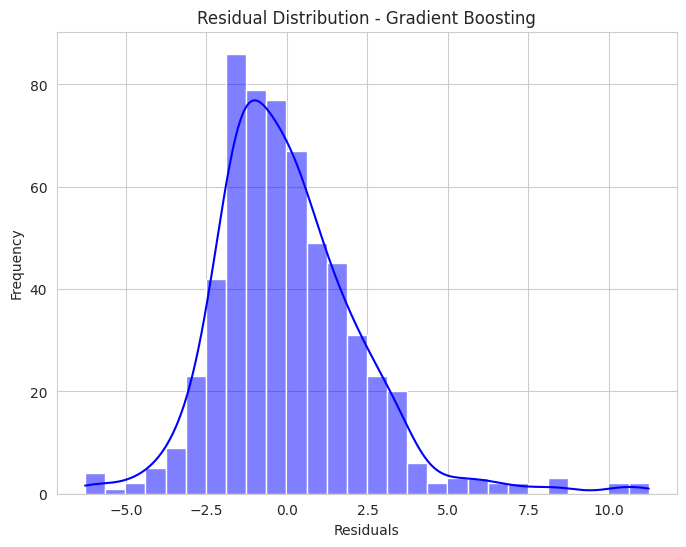

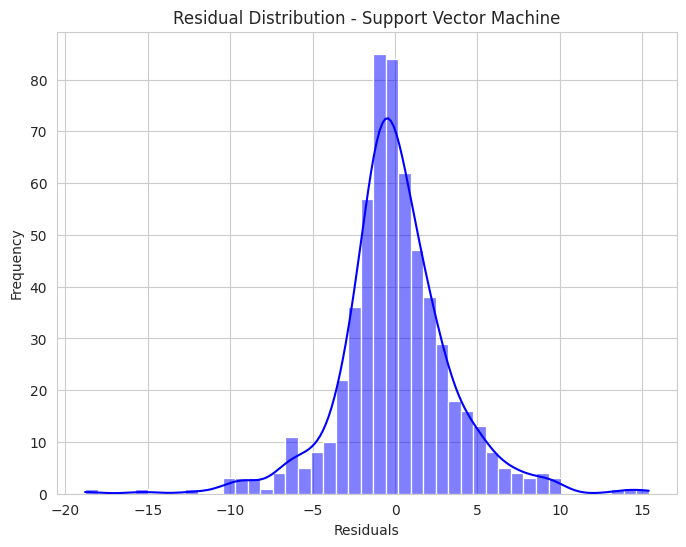

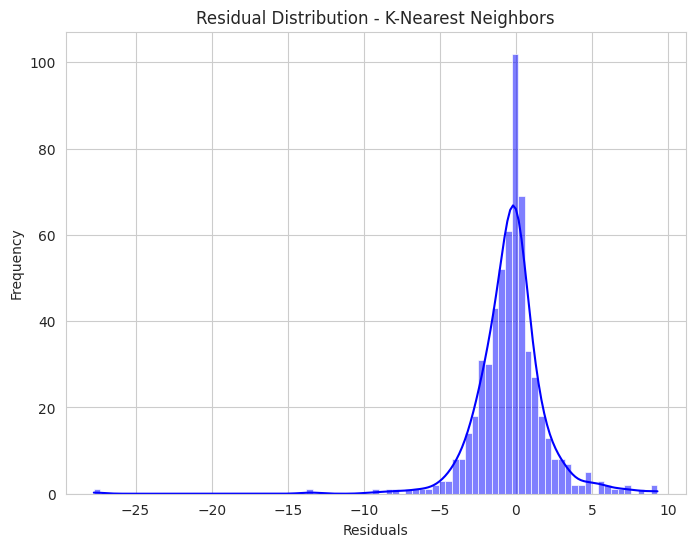

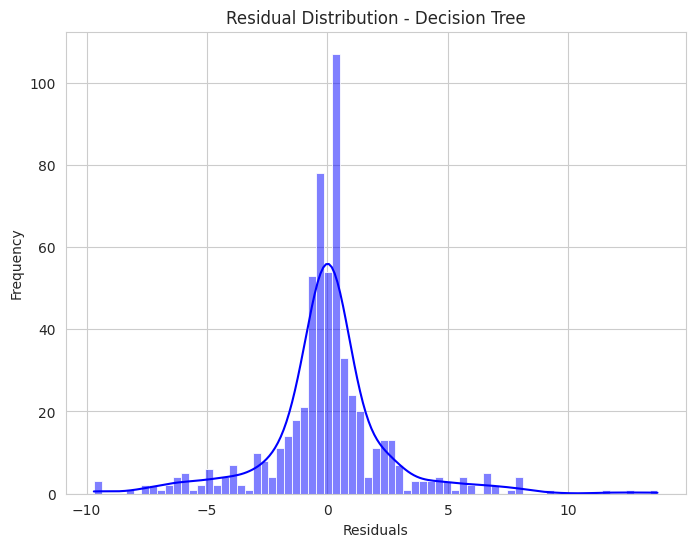

In [ ]:
#21: Residual Analysis for All Models
models = [
    (LinearRegression(), "Linear Regression"),
    (RandomForestRegressor(), "Random Forest"),
    (GradientBoostingRegressor(), "Gradient Boosting"),
    (SVR(), "Support Vector Machine"),
    (KNeighborsRegressor(), "K-Nearest Neighbors"),
    (DecisionTreeRegressor(), "Decision Tree")
]

for model, name in models:
    model.fit(x_train_scaled, y_train)
    residuals = y_test - model.predict(x_test_scaled)
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color="blue")
    plt.title(f"Residual Distribution - {name}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
#22: Compare Cross-Validation Scores
for model, name in models:
    scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring="r2")
    print(f"Model: {name} | CV Mean R2: {np.mean(scores):.4f} | CV Std: {np.std(scores):.4f}")


Model: Linear Regression | CV Mean R2: 0.7447 | CV Std: 0.0221
Model: Random Forest | CV Mean R2: 0.9532 | CV Std: 0.0072
Model: Gradient Boosting | CV Mean R2: 0.9353 | CV Std: 0.0076
Model: Support Vector Machine | CV Mean R2: 0.8531 | CV Std: 0.0169
Model: K-Nearest Neighbors | CV Mean R2: 0.9201 | CV Std: 0.0130
Model: Decision Tree | CV Mean R2: 0.9112 | CV Std: 0.0119


In [ ]:
#23: Feature Importance for All Models
def feature_importance_plot_all(models):
    for model, name in models:
        print(f"Feature Importance for {name}:")

        # Fit the model
        model.fit(x_train_scaled, y_train)

        # Handle feature importance differently for various models
        if hasattr(model, "feature_importances_"):  # For tree-based models
            importances = model.feature_importances_
            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")
            plt.title(f"Feature Importance - {name}")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.show()

        elif hasattr(model, "coef_"):  # For Linear Regression
            importances = abs(model.coef_)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")
            plt.title(f"Feature Coefficients - {name}")
            plt.xlabel("Coefficient Magnitude")
            plt.ylabel("Features")
            plt.show()

        else:  # For models like SVR and KNN (use permutation importance)
            result = permutation_importance(model, x_train_scaled, y_train, n_repeats=10, random_state=42)
            importances = result.importances_mean
            plt.figure(figsize=(10, 6))
            sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")
            plt.title(f"Permutation Importance - {name}")
            plt.xlabel("Importance")
            plt.ylabel("Features")
            plt.show()


Feature Importance for Random Forest:


<ipython-input-82-eb2cc14cdfd2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


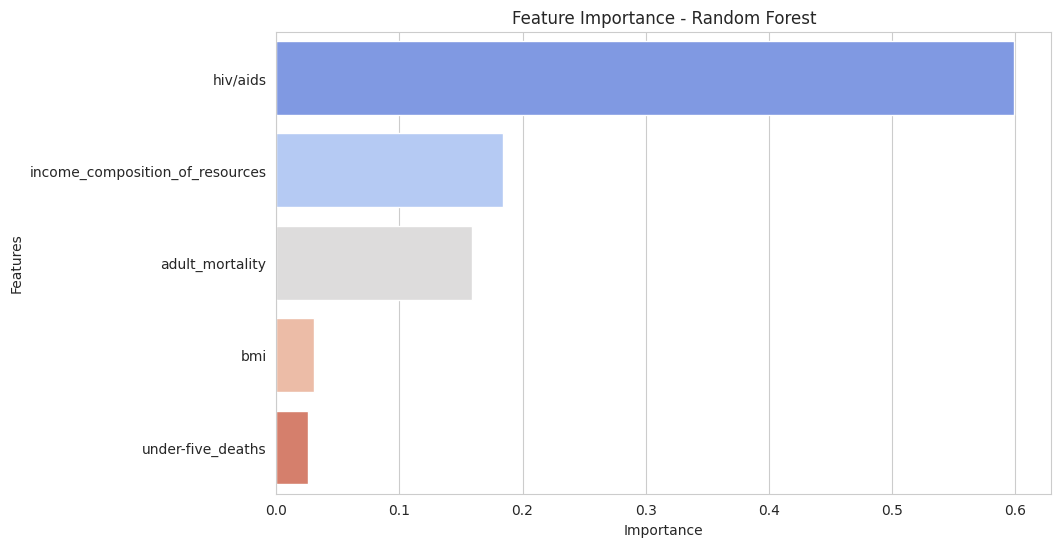

Feature Importance for Gradient Boosting:


<ipython-input-82-eb2cc14cdfd2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


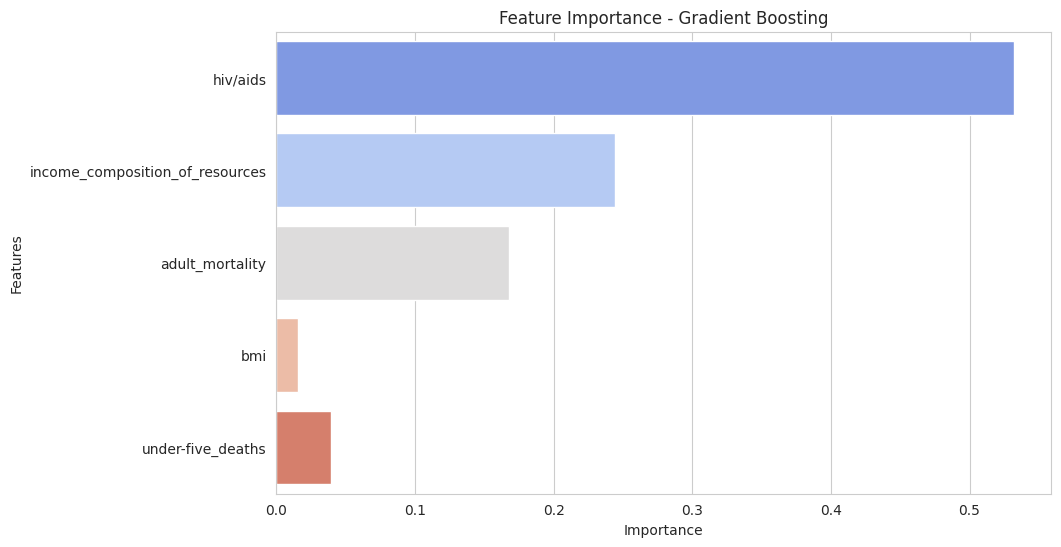

Feature Importance for Linear Regression:


<ipython-input-82-eb2cc14cdfd2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


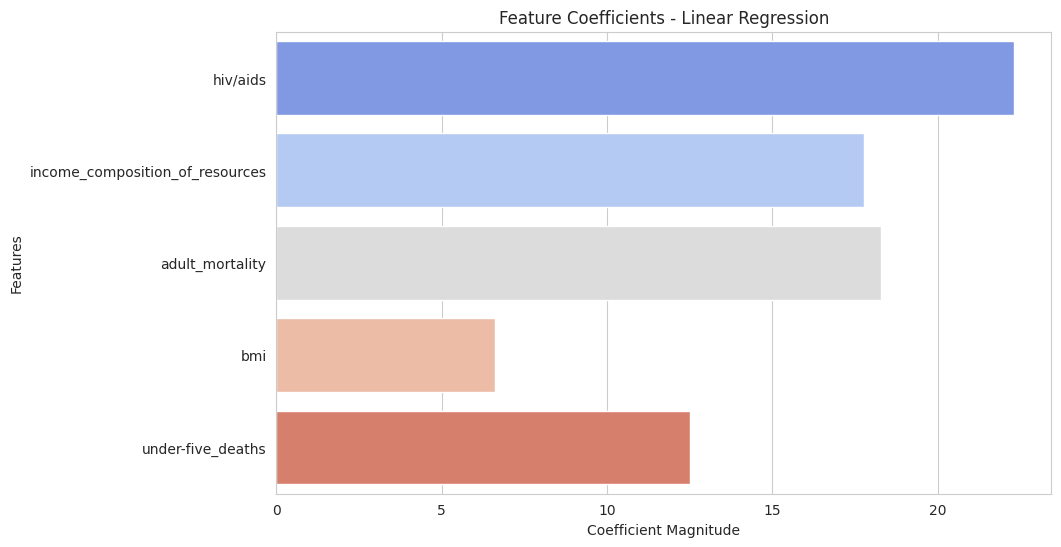

Feature Importance for Support Vector Regressor:


<ipython-input-82-eb2cc14cdfd2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


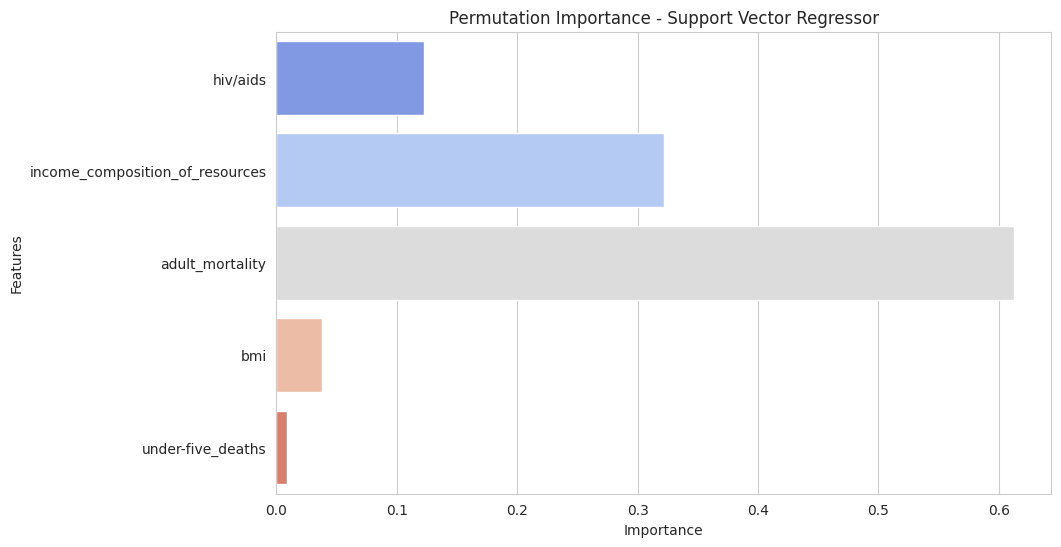

Feature Importance for KNN Regressor:


<ipython-input-82-eb2cc14cdfd2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


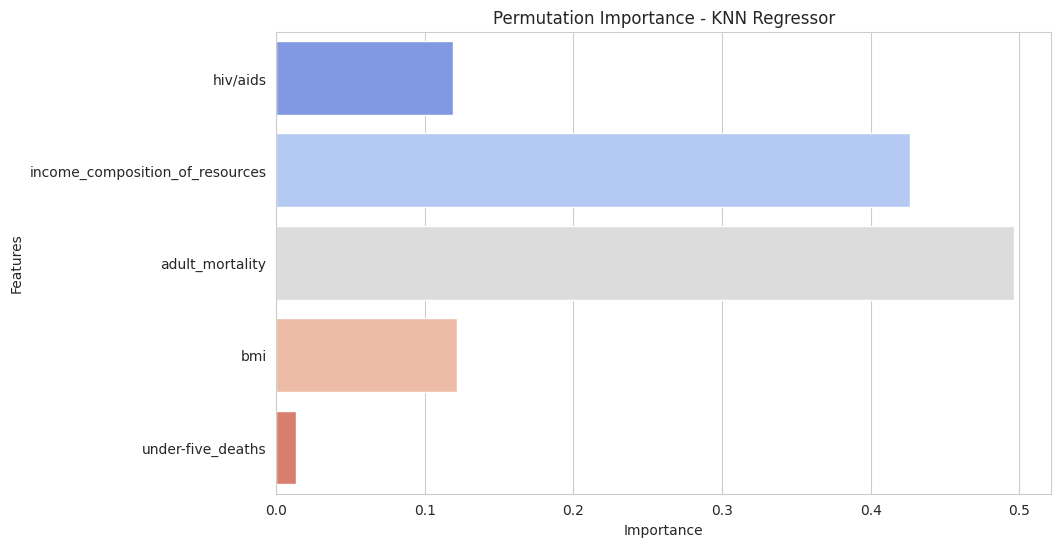

Feature Importance for Decision Tree:


<ipython-input-82-eb2cc14cdfd2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=x_train.columns, palette="coolwarm")


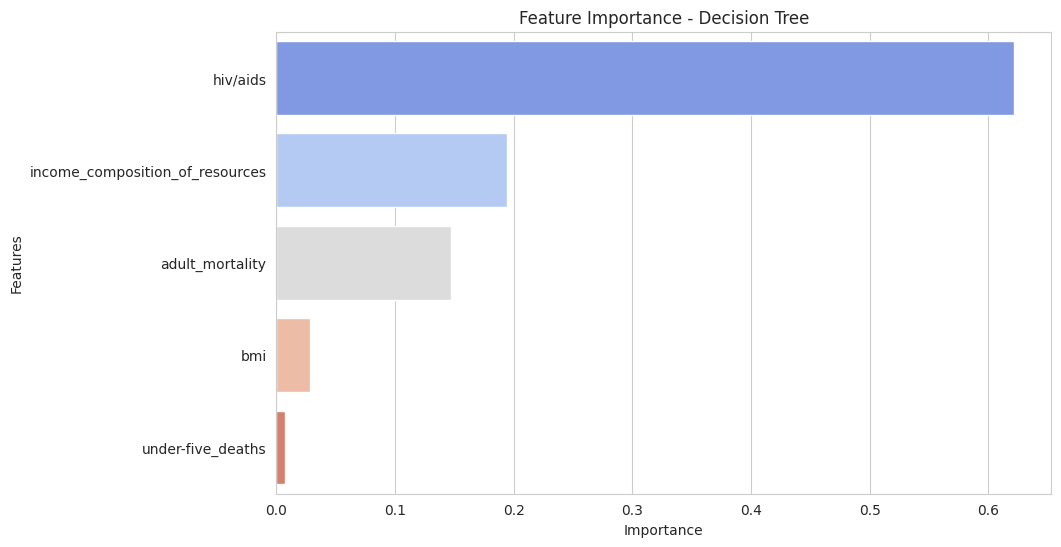

In [ ]:
#24: Define Models and Generate Feature Importance Plots
models = [
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (GradientBoostingRegressor(n_estimators=100, random_state=42), "Gradient Boosting"),
    (LinearRegression(), "Linear Regression"),
    (SVR(C=10, epsilon=0.1), "Support Vector Regressor"),
    (KNeighborsRegressor(n_neighbors=5), "KNN Regressor"),
    (DecisionTreeRegressor(max_depth=6, random_state=42), "Decision Tree"),
]

# Generate feature importance plots for all models
feature_importance_plot_all(models)


 97%|=================== | 573/588 [00:22<00:00]       

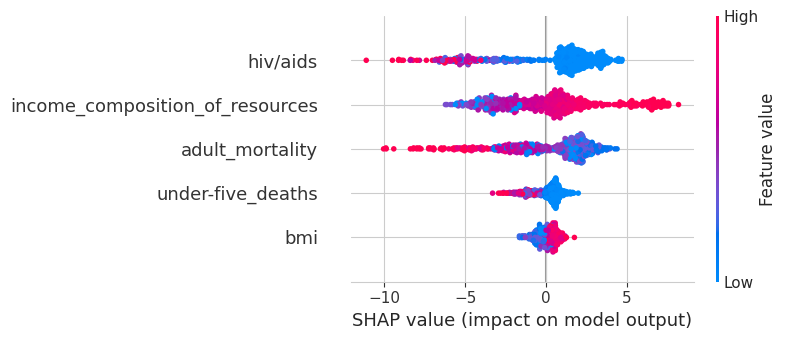

In [ ]:
#25: SHAP Analysis
rf_model.fit(x_train_scaled, y_train)

explainer = shap.Explainer(rf_model, x_test_scaled)
shap_values = explainer(x_test_scaled)

# Plot summary
shap.summary_plot(shap_values, x_test_scaled, feature_names=x_test.columns)


In [ ]:
#26: Hyperparameter Tuning for All Models
# Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, scoring='r2')
rf_grid.fit(x_train_scaled, y_train)
print("Random Forest Best Parameters:", rf_grid.best_params_)

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=3, scoring='r2')
gb_grid.fit(x_train_scaled, y_train)
print("Gradient Boosting Best Parameters:", gb_grid.best_params_)

# Support Vector Regressor
svr_param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1],
    'kernel': ['rbf', 'linear']
}
svr_grid = GridSearchCV(SVR(), svr_param_grid, cv=3, scoring='r2')
svr_grid.fit(x_train_scaled, y_train)
print("SVR Best Parameters:", svr_grid.best_params_)

# KNN Regressor
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=3, scoring='r2')
knn_grid.fit(x_train_scaled, y_train)
print("KNN Regressor Best Parameters:", knn_grid.best_params_)

# Decision Tree
dt_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=3, scoring='r2')
dt_grid.fit(x_train_scaled, y_train)
print("Decision Tree Best Parameters:", dt_grid.best_params_)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
print("Linear Regression does not require hyperparameter tuning.")


Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
SVR Best Parameters: {'C': 100, 'epsilon': 0.5, 'kernel': 'rbf'}
KNN Regressor Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Linear Regression does not require hyperparameter tuning.


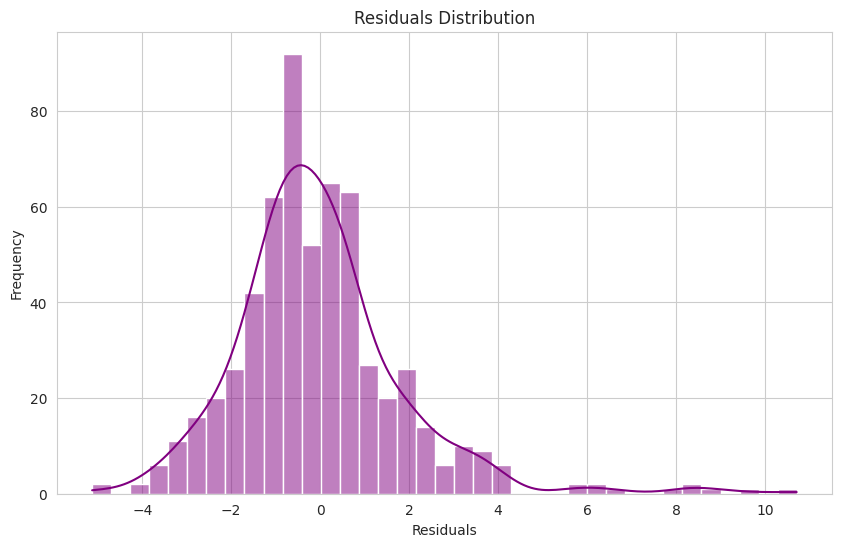

In [ ]:
#27: Residual Analysis
best_model = rf_grid.best_estimator_  # Use the best model from Random Forest

# Calculate residuals
residuals = y_test - best_model.predict(x_test_scaled)

# Plot residual distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#28: Final Model Performance
def evaluate_final_model():
    train_r2 = r2_score(y_train, best_model.predict(x_train_scaled))
    test_r2 = r2_score(y_test, best_model.predict(x_test_scaled))
    print(f"Final Model - Train R2: {train_r2:.4f}")
    print(f"Final Model - Test R2: {test_r2:.4f}")

evaluate_final_model()


Final Model - Train R2: 0.9855
Final Model - Test R2: 0.9587


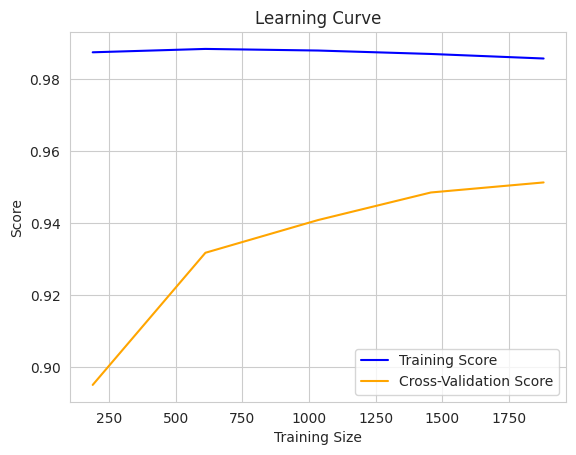

In [ ]:
#29: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train_scaled, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score", color="orange")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.show()



In [ ]:
#30: Save Final Model
joblib.dump(best_model, "final_model.pkl")
print("Model saved as final_model.pkl")


Model saved as final_model.pkl


In [ ]:
#31: Model Comparisons
models = [
    (KNeighborsRegressor(n_neighbors=5), 'KNN Regressor'),
    (GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_split=5), 'Gradient Boosting'),
    (LinearRegression(), 'Linear Regressor'),
    (DecisionTreeRegressor(max_depth=6, random_state=42), 'Decision Tree'),
    (RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=5), 'Random Forest'),
    (SVR(C=9.0, epsilon=0.9, kernel='rbf'), 'SVR')
]

for model, name in models:
    run_model(model, name)


Model: KNN Regressor
Train R2: 0.9554
Test R2: 0.9306

Model: Gradient Boosting
Train R2: 0.9867
Test R2: 0.9594

Model: Linear Regressor
Train R2: 0.7506
Test R2: 0.7233

Model: Decision Tree
Train R2: 0.9352
Test R2: 0.9140

Model: Random Forest
Train R2: 0.9634
Test R2: 0.9461

Model: SVR
Train R2: 0.9056
Test R2: 0.9062



<ipython-input-92-4d4ef669ebbe>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat(


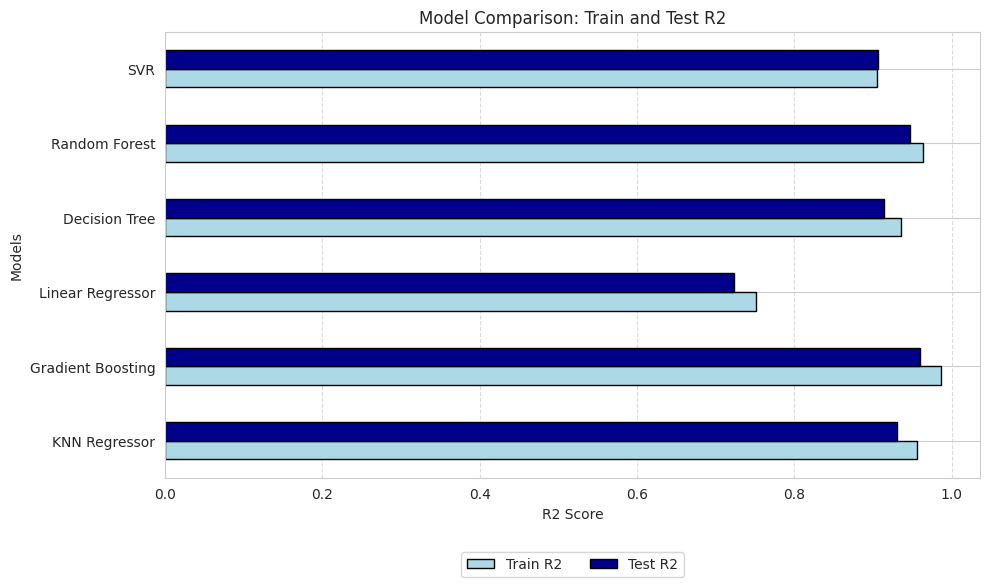

In [ ]:
#32: Results Visualization
# Initialize an empty DataFrame for storing results
model_results = pd.DataFrame(columns=["Model Name", "Train R2", "Test R2"])

# Iterate through models and compute Train/Test R2
for model, name in models:
    model.fit(x_train_scaled, y_train)
    train_r2 = r2_score(y_train, model.predict(x_train_scaled))
    test_r2 = r2_score(y_test, model.predict(x_test_scaled))
    model_results = pd.concat(
        [
            model_results,
            pd.DataFrame({"Model Name": [name], "Train R2": [train_r2], "Test R2": [test_r2]})
        ],
        ignore_index=True
    )

# Set 'Model Name' as the index for better visualization
model_results.set_index("Model Name", inplace=True)

# Plot the results with legend position
ax = model_results.plot(
    kind='barh', figsize=(10, 6), color=['#add8e6', '#00008b'], edgecolor='black'
)
plt.title("Model Comparison: Train and Test R2")
plt.xlabel("R2 Score")
plt.ylabel("Models")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust the legend to appear outside the plot
plt.legend(["Train R2", "Test R2"], loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
#33: Project Report
model_scores = {}

for model, name in [
    (rf_grid.best_estimator_, "Random Forest"),
    (gb_grid.best_estimator_, "Gradient Boosting"),
    (svr_grid.best_estimator_, "SVR"),
    (knn_grid.best_estimator_, "KNN Regressor"),
    (dt_grid.best_estimator_, "Decision Tree"),
    (lr_model, "Linear Regression")
]:
    train_r2 = r2_score(y_train, model.predict(x_train_scaled))
    test_r2 = r2_score(y_test, model.predict(x_test_scaled))
    model_scores[name] = {
        "Train R2": train_r2,
        "Test R2": test_r2,
        "Model Object": model
    }

best_model_name = max(model_scores, key=lambda x: model_scores[x]["Test R2"])
print("### Project Report ###")
print(f"Best Model: {best_model_name}")
print(f"Train R2: {model_scores[best_model_name]['Train R2']:.4f}")
print(f"Test R2: {model_scores[best_model_name]['Test R2']:.4f}")


### Project Report ###
Best Model: Gradient Boosting
Train R2: 0.9875
Test R2: 0.9593
